<h1>PPP2R1A</h1>

In [1]:
import genophenocorr
from IPython.display import HTML, display
import hpotk
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

Loaded HPO v2024-08-13
Using genophenocorr version 0.1.1dev


## Setup

In [2]:
fpath_phenopackets = 'phenopackets'
PPP2R1A_transcript_id = 'NM_014225.6'
PPP2R1A_protein_id = "NP_055040.2"

### Load phenopackets

We'll load the phenopacket JSON files stored in the `phenopackets` folder next to the notebook.

In [3]:
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.view import CohortViewable

cohort_creator = configure_caching_cohort_creator(hpo)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)
viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=PPP2R1A_transcript_id)))

Patients Created: 100%|██████████| 60/60 [00:28<00:00,  2.10it/s]
Validated under none policy
No errors or warnings were found
60 phenopacket(s) found at `phenopackets`


HPO Term,ID,Annotation Count
Hypotonia,HP:0001252,42
Delayed speech and language development,HP:0000750,31
Feeding difficulties,HP:0011968,31
Motor delay,HP:0001270,29
Seizure,HP:0001250,24
Agenesis of corpus callosum,HP:0001274,21
Microcephaly,HP:0000252,20
"Intellectual disability, severe",HP:0010864,17
Global developmental delay,HP:0001263,17
"Intellectual disability, moderate",HP:0002342,16


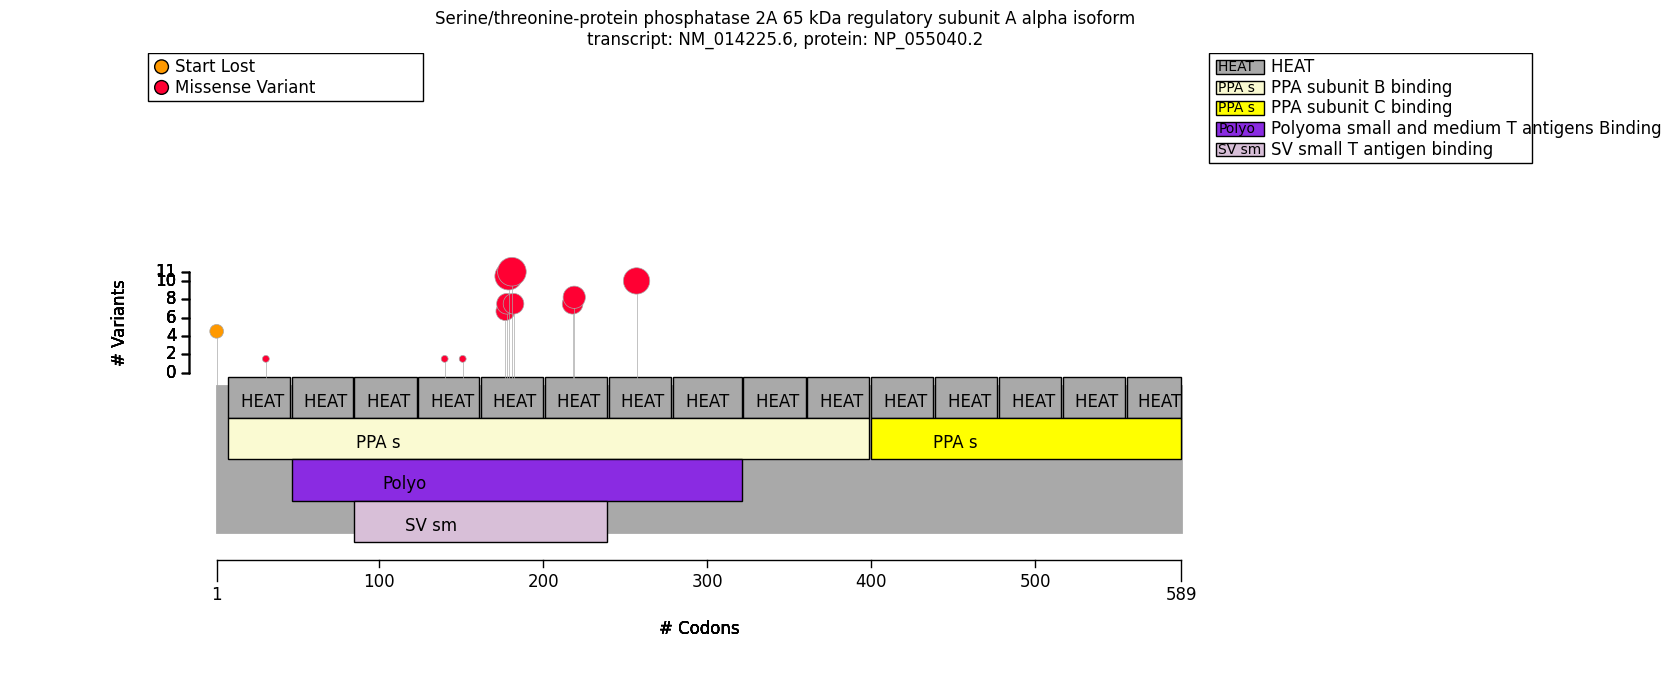

In [4]:
from genophenocorr.model.genome import GRCh38

from genophenocorr.preprocessing import configure_protein_metadata_service, VVMultiCoordinateService
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(PPP2R1A_transcript_id)
protein_id = 'NP_037407.4'

pms = configure_protein_metadata_service()
protein_meta = pms.annotate(PPP2R1A_protein_id)

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
ax = drawer.draw_fig(pvis=pvis)

In [5]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.heuristic_strategy(threshold_HPO_observed_frequency=0.25)
hpo_analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

## Run analysis

Test for genotype-phenotype correlation between variants located in some protein region vs. the variants outside of the region.

In [7]:
from genophenocorr.analysis.predicate.genotype import VariantPredicates
from genophenocorr.analysis.predicate import PatientCategories

is_variant = VariantPredicates.variant_key("19_52212726_52212726_C_T")
by_var = hpo_analysis.compare_hpo_vs_genotype(is_variant)
by_var.summarize(hpo, PatientCategories.YES)

ZeroDivisionError: float division by zero

In [8]:
from genophenocorr.model import FeatureType
from genophenocorr.analysis.predicate.genotype import ProteinPredicates

pp = ProteinPredicates(pms)
is_region = pp.protein_feature_type(feature_type=FeatureType.REGION, tx_id=PPP2R1A_transcript_id)
by_region = hpo_analysis.compare_hpo_vs_genotype(is_region)
by_region.summarize(hpo, PatientCategories.YES)

ZeroDivisionError: float division by zero

TODO - finalize!